# **TASK # 04**

# **Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

# **Sample Dataset :-** https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

# **STEP 1:SET UP THE ENVIRONMENT**

In [16]:
!pip install pandas numpy matplotlib seaborn nltk wordcloud


# **STEP 2:LOAD THE DATASET**

In [14]:
# Load the dataset
df = pd.read_csv('twitter_training.csv')
print(df.head())
print(df.columns)



   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


# **STEP 3:PERFORM DATA CLEANING AND PREPROCESSING**

In [23]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define the column name for text data
text_column = 'im getting on borderlands and i will murder you all ,'
sentiment_column = "Positive"  # Assuming 'Positive' is the sentiment column based on the provided snippet


# Check if the text column exists
if text_column in df.columns:
    # Drop rows with missing values in the text column
    df.dropna(subset=[text_column], inplace=True)
else:
    raise KeyError(f"The dataset does not contain a '{text_column}' column. Please check the column names.")

# Function to preprocess text
def preprocess_text(text):
    words = [word for word in text.split() if word.lower() not in stop_words]
    return ' '.join(words)

# Apply preprocessing
df['cleaned_text'] = df[text_column].apply(preprocess_text)

# Display the first few rows of the cleaned dataframe
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  \
0  I am coming to the borders and I will kill you...      
1  im getting on borderlands and i will kill you ...      
2  im coming on borderlands and i will murder you...      
3  im getting on borderlands 2 and i will murder ...      
4  im getting into borderlands and i can murder y...      

                           cleaned_text  
0              coming borders kill all,  
1      im getting borderlands kill all,  
2     im coming borderlands murder all,  
3  im getting borderlands 2 murder all,  
4    im getting borderlands murder all,  


# **STEP 4:ANALYZE THE SENTIMENT DATA**

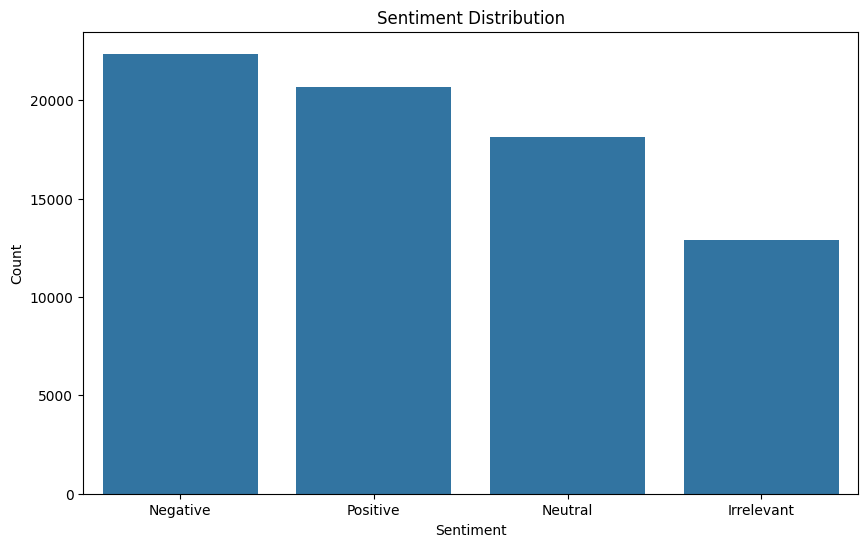

In [20]:
# Sentiment distribution
sentiment_counts = df['Positive'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# **STEP 5:VISUALIZE THE SENTIMENT PATTERNS**

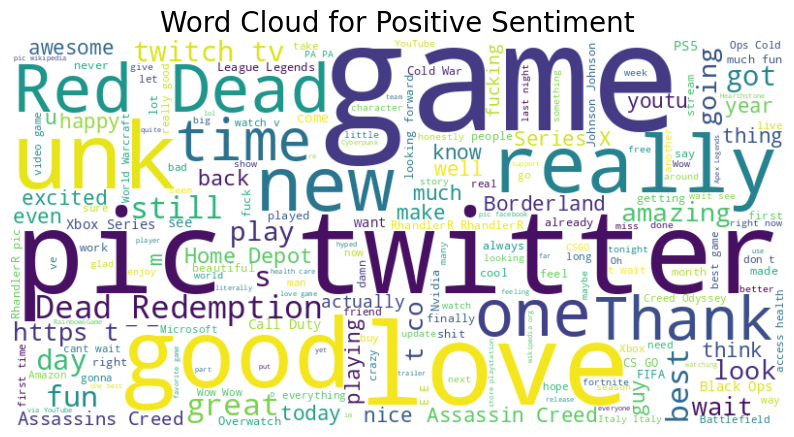

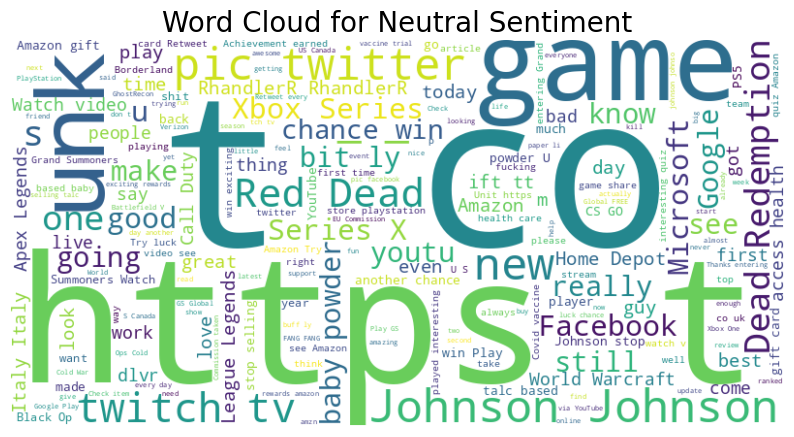

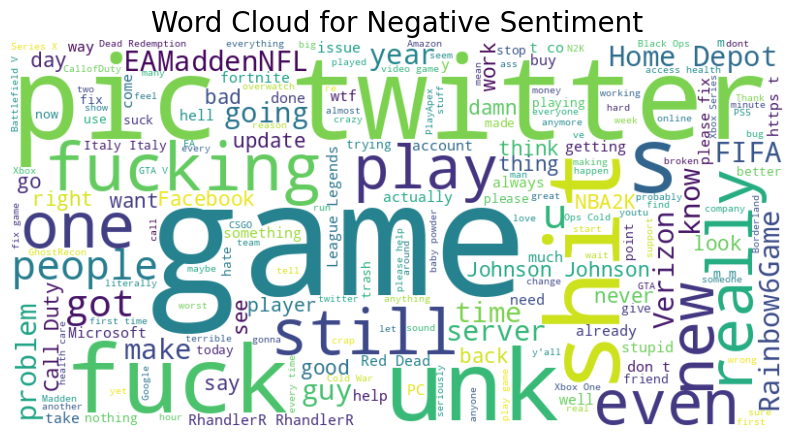

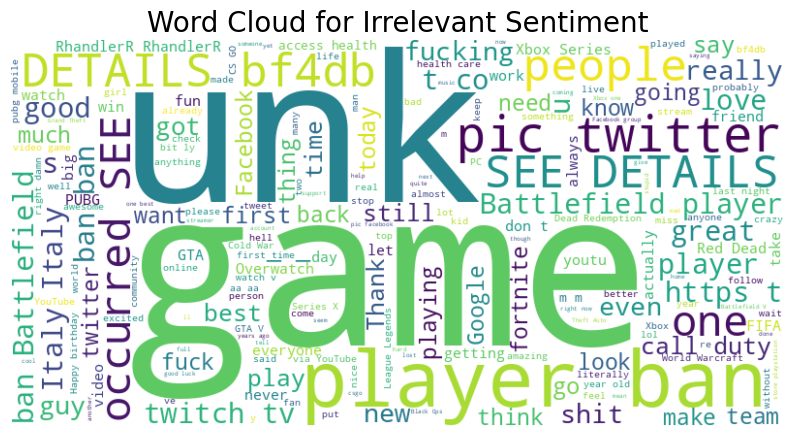

In [24]:
# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Word clouds for each sentiment
for sentiment in df[sentiment_column].unique():
    text = ' '.join(df[df[sentiment_column] == sentiment]['cleaned_text'].values)
    generate_word_cloud(text, f'Word Cloud for {sentiment} Sentiment')
